In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Sagar Kandpal\Desktop\ML EXAMPLE\Modular\ML_Live_Class\data\penguins_size.csv')
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [3]:
df = df.dropna()

In [4]:
X = pd.get_dummies(df.drop('species', axis =1), drop_first = True)

In [5]:
y = df['species']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
forest = RandomForestClassifier(n_estimators = 10, max_features = 'auto', random_state =101) 

In [11]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [12]:
preds = forest.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, plot_confusion_matrix

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


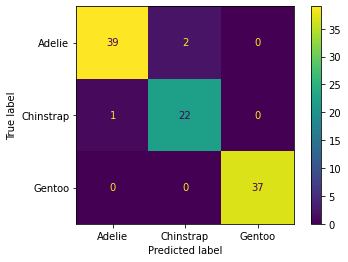

In [14]:
plot_confusion_matrix(forest, X_test, y_test)

In [15]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [17]:
df = pd.read_csv(r'C:\Users\Sagar Kandpal\Desktop\ML EXAMPLE\Modular\ML_Live_Class\data\data_banknote_authentication.csv')
df.head()

Variance_Wavelet  Skewness_Wavelet  Curtosis_Wavelet  Image_Entropy  Class
0           3.62160            8.6661           -2.8073       -0.44699      0
1           4.54590            8.1674           -2.4586       -1.46210      0
2           3.86600           -2.6383            1.9242        0.10645      0
3           3.45660            9.5228           -4.0112       -3.59440      0
4           0.32924           -4.4552            4.5718       -0.98880      0

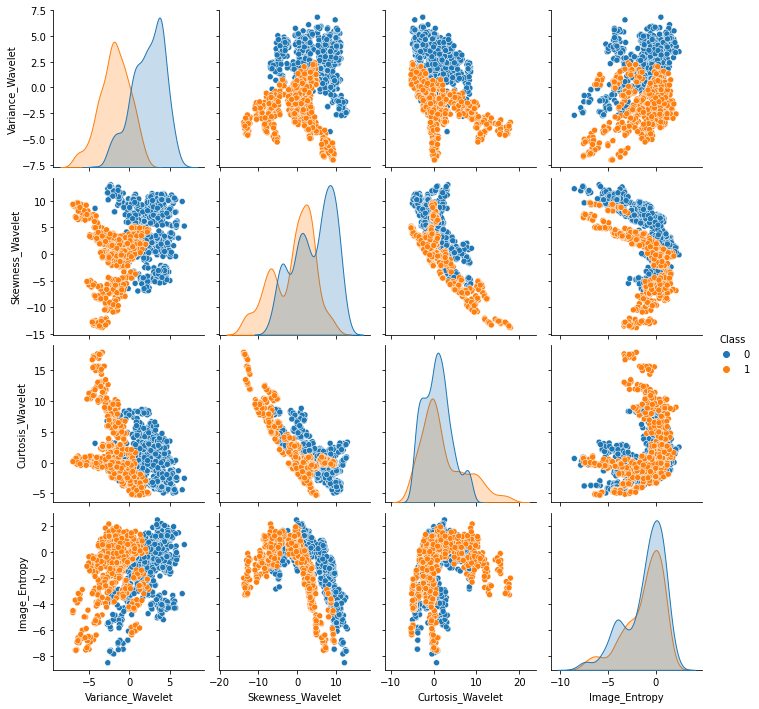

In [18]:
sns.pairplot(df, hue = 'Class')

In [19]:
X = df.drop('Class', axis =1)

In [20]:
y = df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 101)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [24]:
n_estimators = [64, 100, 125, 200]
max_features = [2,3,4]
bootstrap = [True, False]
oob_score = [True, False]

In [25]:
param_grid = {'n_estimators': n_estimators, 'max_features':max_features, 'bootstrap': bootstrap, 'oob_score': oob_score }

In [26]:
forest_model = RandomForestClassifier()

In [28]:
grid_model = GridSearchCV(forest_model, param_grid, verbose = 2)

In [29]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  wa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 125, 200],
                         'oob_score': [True, False]},
             verbose=2)

In [30]:
grid_model.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [38]:
predictions = grid_model.predict(X_test)

In [32]:
rfc =  RandomForestClassifier(max_features =2, n_estimators = 200, oob_score = True)

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [35]:
rfc.oob_score_

0.993517017828201

In [37]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.98      1.00      0.99        49

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


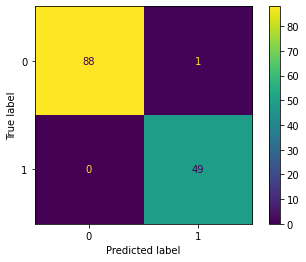

In [40]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [41]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0], dtype=int64)

In [43]:
np.sum(preds != predictions)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


1

In [45]:
from sklearn.metrics import accuracy_score
errors = []
misclassifications = []

for n in range(1, 200):
    rfc =  RandomForestClassifier(max_features =2, n_estimators = n)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    error = 1- accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)

    errors.append(error)
    misclassifications.append(n_missed)

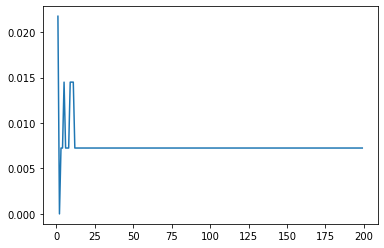

In [46]:
plt.plot(range(1,200), errors)

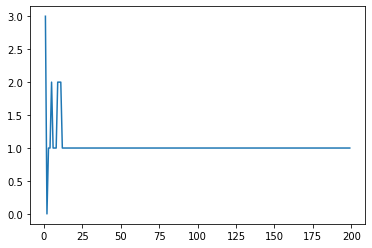

In [47]:
plt.plot(range(1,200), misclassifications)